# Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('cleaned_imdb.csv')

<IPython.core.display.Javascript object>

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.head()


,movie_id,title,runtime,certificate,imdb_rating,year,votes,summary,user_review,critic_review,...,Family,History,Music,Animation,Sport,Musical,Film-Noir,Documentary,News,Short
0,tt7286456,Joker,122.0,R,8.5,2019,804730,"In Gotham City, mentally troubled comedian Art...",10188,682,...,0,0,0,0,0,0,0,0,0,0
1,tt6751668,Parasite,132.0,R,8.6,2019,423230,Greed and class discrimination threaten the ne...,2507,515,...,0,0,0,0,0,0,0,0,0,0
2,tt8579674,1917,119.0,R,8.3,2019,324071,"April 6th, 1917. As a regiment assembles to wa...",2674,461,...,0,0,0,0,0,0,0,0,0,0
3,tt4154796,Avengers: Endgame,181.0,PG-13,8.4,2019,726032,After the devastating events of Avengers: Infi...,8764,550,...,0,0,0,0,0,0,0,0,0,0
4,tt0068646,The Godfather,175.0,R,9.2,1972,1551490,The aging patriarch of an organized crime dyna...,3824,249,...,0,0,0,0,0,0,0,0,0,0


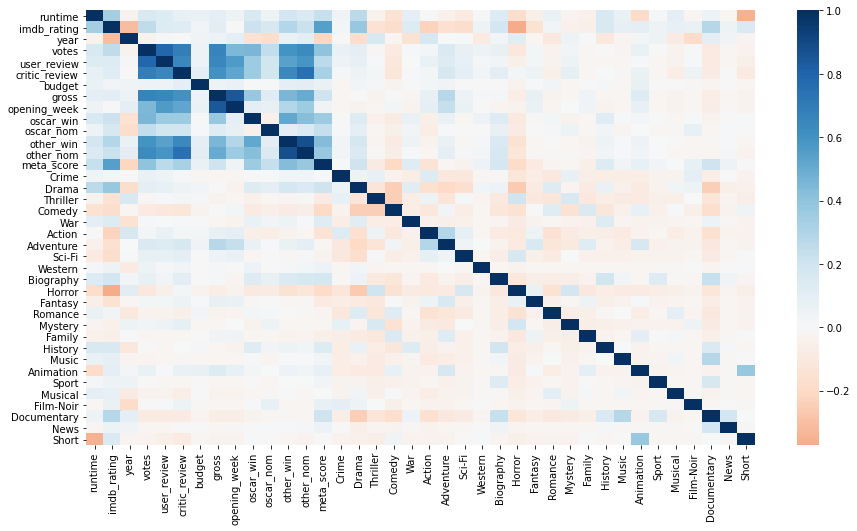

In [6]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), 
            center = 0, 
           cmap = 'RdBu');

Text(0.5, 1.0, 'Correlation between features')

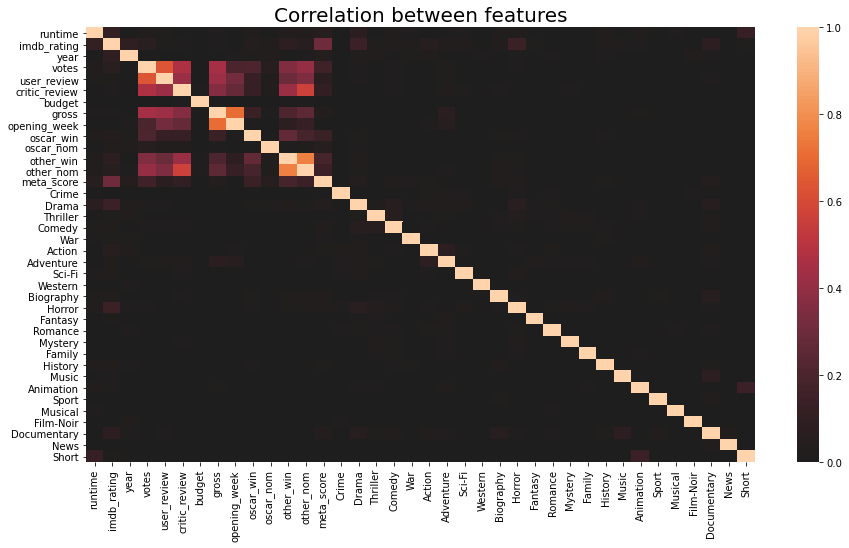

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr()**2,
            center=0
           );
plt.title("Correlation between features", size = 20)

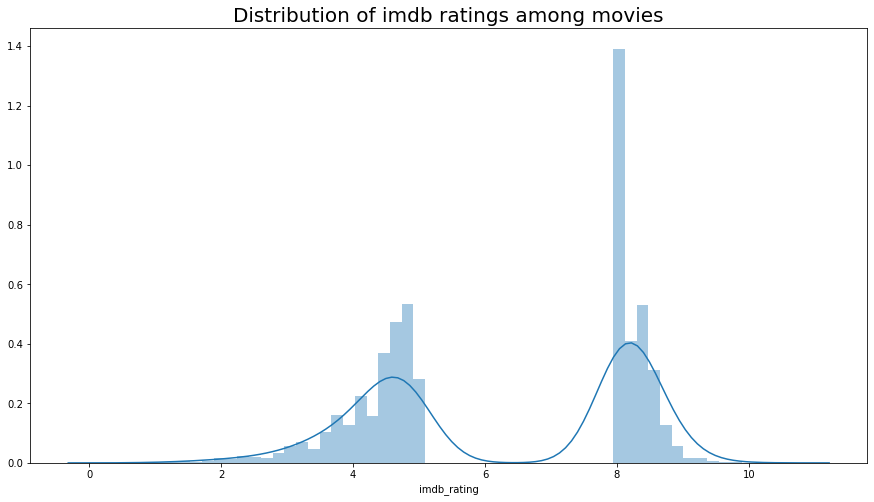

In [9]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.imdb_rating,bins = 50);
plt.title("Distribution of imdb ratings among movies", size = 20);

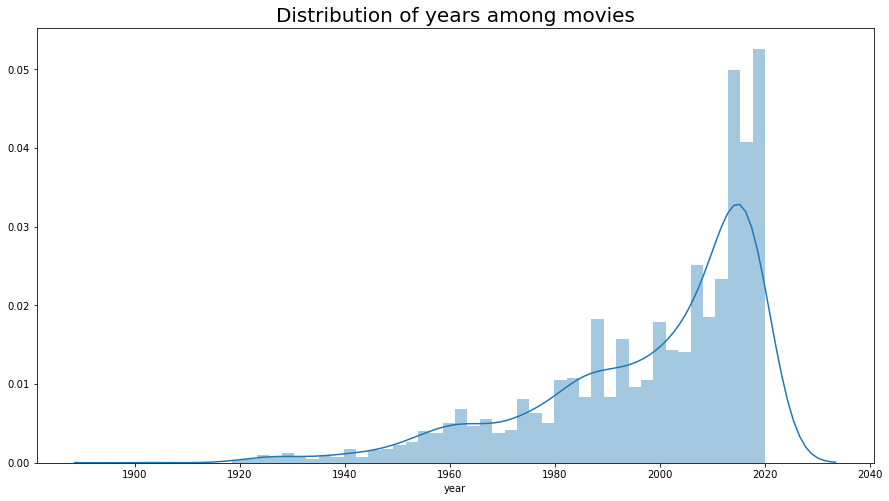

In [10]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.year,bins = 50);
plt.title("Distribution of years among movies", size = 20);

# Feature Engineering

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       2834 non-null   object 
 1   title          2834 non-null   object 
 2   runtime        2834 non-null   float64
 3   certificate    2834 non-null   object 
 4   imdb_rating    2834 non-null   float64
 5   year           2834 non-null   object 
 6   votes          2834 non-null   int64  
 7   summary        2834 non-null   object 
 8   user_review    2834 non-null   int64  
 9   critic_review  2834 non-null   int64  
 10  language       2834 non-null   object 
 11  country        2834 non-null   object 
 12  budget         2834 non-null   int64  
 13  gross          2834 non-null   int64  
 14  opening_week   2834 non-null   int64  
 15  oscar_win      2834 non-null   int64  
 16  oscar_nom      2834 non-null   int64  
 17  other_win      2834 non-null   int64  
 18  other_no

In [12]:
df.year = df.year.astype(str)

In [13]:
df.head()

,movie_id,title,runtime,certificate,imdb_rating,year,votes,summary,user_review,critic_review,...,Family,History,Music,Animation,Sport,Musical,Film-Noir,Documentary,News,Short
0,tt7286456,Joker,122.0,R,8.5,2019,804730,"In Gotham City, mentally troubled comedian Art...",10188,682,...,0,0,0,0,0,0,0,0,0,0
1,tt6751668,Parasite,132.0,R,8.6,2019,423230,Greed and class discrimination threaten the ne...,2507,515,...,0,0,0,0,0,0,0,0,0,0
2,tt8579674,1917,119.0,R,8.3,2019,324071,"April 6th, 1917. As a regiment assembles to wa...",2674,461,...,0,0,0,0,0,0,0,0,0,0
3,tt4154796,Avengers: Endgame,181.0,PG-13,8.4,2019,726032,After the devastating events of Avengers: Infi...,8764,550,...,0,0,0,0,0,0,0,0,0,0
4,tt0068646,The Godfather,175.0,R,9.2,1972,1551490,The aging patriarch of an organized crime dyna...,3824,249,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def custom_encoder(df,feature):
    unique_feature = []
    for i in df.loc[:,feature]:
        a = i.split(",")
        for b in a:
            if b.strip() not in unique_feature:
                unique_feature.append(b.strip())
    cleaned_feature = []
    for i in df.loc[:,feature]:
        a = i.split(",")
        c =[]
        for b in a:
            c.append(b.strip())
        cleaned_feature.append(c)
    for i in unique_feature:
        df[i] = [1 if i in x else 0 for x in cleaned_feature]
    df.drop(columns=[feature], inplace = True)
    return df


df = custom_encoder(df, 'country')

In [16]:
df.year = df.year.astype(str)

In [17]:
df = pd.get_dummies(df, columns=["language", "certificate", "year"], drop_first=True)

<IPython.core.display.Javascript object>

In [18]:
df.head()

,movie_id,title,runtime,imdb_rating,votes,summary,user_review,critic_review,budget,gross,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,tt7286456,Joker,122.0,8.5,804730,"In Gotham City, mentally troubled comedian Art...",10188,682,55000000,335451311,...,0,0,0,0,0,0,0,0,1,0
1,tt6751668,Parasite,132.0,8.6,423230,Greed and class discrimination threaten the ne...,2507,515,11400000,53369749,...,0,0,0,0,0,0,0,0,1,0
2,tt8579674,1917,119.0,8.3,324071,"April 6th, 1917. As a regiment assembles to wa...",2674,461,95000000,159227644,...,0,0,0,0,0,0,0,0,1,0
3,tt4154796,Avengers: Endgame,181.0,8.4,726032,After the devastating events of Avengers: Infi...,8764,550,356000000,858373000,...,0,0,0,0,0,0,0,0,1,0
4,tt0068646,The Godfather,175.0,9.2,1551490,The aging patriarch of an organized crime dyna...,3824,249,6000000,134966411,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df['label'] = df.imdb_rating.apply(lambda x : 1 if x > 7.5 else 0)


In [21]:
df.label

0       1
1       1
2       1
3       1
4       1
       ..
2829    0
2830    0
2831    0
2832    0
2833    0
Name: label, Length: 2834, dtype: int64

In [22]:
X = df.drop(["movie_id", "title", "imdb_rating","label", "summary" ],axis = 1)

In [23]:
y= df.label

In [24]:
X.head()

,runtime,votes,user_review,critic_review,budget,gross,opening_week,oscar_win,oscar_nom,other_win,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,122.0,804730,10188,682,55000000,335451311,96202337,2,0,92,...,0,0,0,0,0,0,0,0,1,0
1,132.0,423230,2507,515,11400000,53369749,393216,4,0,262,...,0,0,0,0,0,0,0,0,1,0
2,119.0,324071,2674,461,95000000,159227644,576216,3,0,110,...,0,0,0,0,0,0,0,0,1,0
3,181.0,726032,8764,550,356000000,858373000,357115007,0,1,65,...,0,0,0,0,0,0,0,0,1,0
4,175.0,1551490,3824,249,6000000,134966411,302393,3,0,26,...,0,0,0,0,0,0,0,0,0,0


 # Test Train split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

## Scaling

In [26]:
from sklearn.preprocessing import minmax_scale, StandardScaler

scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross","opening_week","meta_score", "other_win", "other_nom"]

scaler = StandardScaler()

X_train[scale] = scaler.fit_transform(X_train[scale])
X_test[scale] = scaler.fit_transform(X_test[scale])

/home/ind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/ind/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/ind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [27]:
X_train

,runtime,votes,user_review,critic_review,budget,gross,opening_week,oscar_win,oscar_nom,other_win,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
2491,-0.077727,-0.307226,-0.367079,-0.650992,0.032819,-0.226819,-0.219532,0,0,-0.201748,...,0,1,0,0,0,0,0,0,0,0
937,0.294753,-0.091057,0.133513,0.811033,-0.117600,-0.343786,-0.215141,0,3,0.141499,...,0,0,0,0,0,0,0,0,0,0
2435,-0.723360,-0.314292,-0.331982,0.115311,-0.078286,-0.360769,-0.219348,0,0,-0.373372,...,0,0,1,0,0,0,0,0,0,0
743,0.667233,-0.096010,-0.095540,0.387550,-0.078286,-0.226819,-0.219532,0,0,-0.201748,...,0,0,0,0,0,0,0,0,0,0
7,0.965218,9.007443,6.572868,3.886325,0.562706,5.341617,4.030540,4,0,8.322219,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,-0.499872,-0.320685,-0.359690,-0.580411,-0.099652,-0.360725,-0.219038,0,0,-0.373372,...,0,0,1,0,0,0,0,0,0,0
144,0.145761,1.571649,1.751664,5.086193,-0.056920,0.701584,-0.197724,2,0,7.063647,...,0,0,0,0,0,0,1,0,0,0
1582,-0.499872,-0.237711,-0.254400,0.942111,-0.018460,-0.172608,0.078462,0,0,-0.258956,...,1,0,0,0,0,0,0,0,0,0
2568,0.567905,-0.320870,-0.374468,-0.681240,-0.078286,-0.226819,-0.219532,0,1,-0.373372,...,0,0,0,0,0,0,0,0,0,0


## Creating Models

In [51]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_recall_curve,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

In [29]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)

max_depth_count = {}
for i in [1,2,3,4,5,6,7,8,9,10]:
    decision_tree = DecisionTreeClassifier(max_depth=i)
    cv_mean = cross_val_score(decision_tree,X_train,y_train,cv=cv,n_jobs=-1).mean()
    
    max_depth_count[i] = cv_mean
    print("Max depth:{}".format(i))
    print(cross_val_score(decision_tree, X_train, y_train, cv=cv, n_jobs = -1).mean())
    

Max depth:1
0.7270588235294118
Max depth:2
0.8367058823529412
Max depth:3
0.8931764705882352
Max depth:4
0.8992941176470588
Max depth:5
0.9251764705882353
Max depth:6
0.9364705882352942
Max depth:7
0.9397647058823528
Max depth:8
0.9392941176470588
Max depth:9
0.9378823529411765
Max depth:10
0.9341176470588236


# Random Forest

In [30]:
grid = {
    'n_estimators': [50, 95,100,110],
    'max_features': [1,2,3,4,5,6,'auto'],
    'criterion': ['gini','entropy'],
    'class_weight': ["balanced","balanced_subsample",None]
}

In [32]:
decision_tree = DecisionTreeClassifier(max_depth=max(max_depth_count, key = max_depth_count.get))

In [33]:
random_forest = RandomForestClassifier(decision_tree)

In [34]:
grid_model = GridSearchCV(random_forest, grid)

In [35]:
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 4,
 'n_estimators': 95}

In [36]:
print (grid_model.best_params_)
print (grid_model.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 4, 'n_estimators': 95}
0.9736470588235294


In [37]:
grid_model

GridSearchCV(estimator=RandomForestClassifier(n_estimators=DecisionTreeClassifier(max_depth=8)),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3, 4, 5, 6, 'auto'],
                         'n_estimators': [50, 95, 100, 110]})

In [38]:
### Using parameter creating model

In [39]:
random_forest_model = RandomForestClassifier(max_features = grid_model.best_params_["max_features"],
                                             n_estimators = grid_model.best_params_["n_estimators"],\
                                             criterion = grid_model.best_params_["criterion"],\
                                             class_weight = grid_model.best_params_["class_weight"])

In [40]:
random_forest_model.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=4, n_estimators=95)

In [41]:
y_pred = random_forest_model.predict(X_test)

## Result Metrics

In [43]:
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted high", "Predicted low"],\
            index=["is high","is low"] )

<IPython.core.display.Javascript object>

,Predicted high,Predicted low
is high,332,32
is low,5,340


In [44]:
print (classification_report(y_test, y_pred, labels=random_forest_model.classes_))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       364
           1       0.91      0.99      0.95       345

    accuracy                           0.95       709
   macro avg       0.95      0.95      0.95       709
weighted avg       0.95      0.95      0.95       709



In [45]:
# Printing accuracy Score
print (accuracy_score(y_test, y_pred))

0.9478138222849083


## Feature Importance

In [47]:
random_forest_model.feature_importances_

array([8.41220408e-02, 5.23263024e-02, 4.36339525e-02, 4.67598945e-02,
       1.99743281e-02, 2.27821749e-02, 2.53320891e-02, 1.59610052e-02,
       1.35185471e-02, 5.44403824e-02, 3.44810272e-02, 6.70185108e-02,
       4.71953767e-03, 2.34035267e-02, 1.05701156e-02, 9.38447609e-03,
       3.65546447e-03, 1.54255738e-02, 7.26503070e-03, 6.81637485e-03,
       8.68517884e-04, 8.84605637e-03, 2.93094866e-02, 4.56663814e-03,
       4.09343151e-03, 3.79763409e-03, 2.21133197e-03, 5.92285606e-03,
       5.11832432e-03, 4.95670453e-03, 2.18825525e-03, 1.63259656e-03,
       2.56131850e-03, 3.04882302e-02, 1.04666043e-03, 7.47962099e-03,
       2.69755348e-02, 5.19425665e-03, 6.59268545e-04, 4.63242653e-03,
       1.39040834e-02, 1.72083205e-03, 4.47171879e-04, 1.90795213e-03,
       8.30380090e-04, 5.18105148e-04, 0.00000000e+00, 1.03231449e-05,
       3.42574915e-04, 3.19311001e-03, 5.64881400e-04, 1.57382971e-04,
       4.03486770e-04, 1.74630958e-04, 7.76148464e-04, 1.00588043e-03,
      

In [48]:
# Get features Gini scores
feature_importances = pd.DataFrame(random_forest_model.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance'])

feature_importances[feature_importances['importance']!=0].sort_values(by='importance', ascending=False).head(10)

<IPython.core.display.Javascript object>

,importance
runtime,0.084122
meta_score,0.067019
other_win,0.054440
votes,0.052326
critic_review,0.046760
user_review,0.043634
language_English,0.036307
other_nom,0.034481
certificate_Unrated,0.031955
Documentary,0.030488


## ROC AUC CURVE

In [49]:
Y_score = grid_model.best_estimator_.predict_proba(X_test)[:,1]

In [53]:
FPR, TPR, _ = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

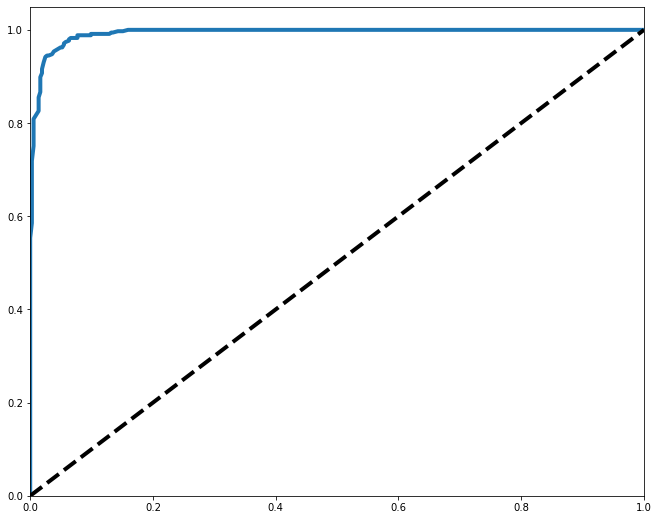

In [56]:
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()